# Compare our values to Nirody et al. 2021
<br>
This notebook = speed vs. step parameters <br>
  ... in Nirody this is:<br>

### Figure 2
### Figure 3
### Figure S1
### Figure S5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip

In [3]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

all_exemplaris_through_9Nov23_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [4]:
# specify the data file
data_file = 'iw_9Nov23_exemplaris_inverted_combined.xlsx'

# Nirody Figure 2

n =  1149 strides are shown


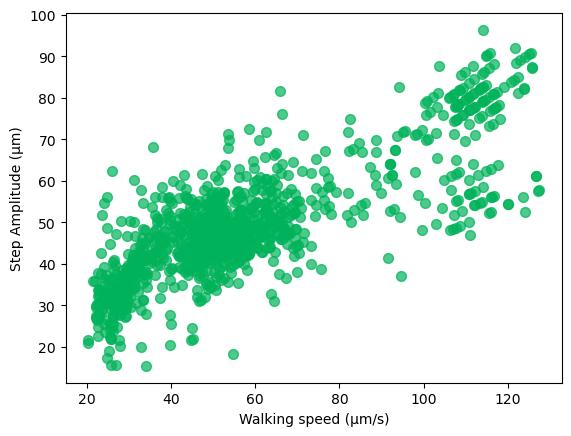

In [10]:
'''
Figure 2A
step amplitude vs. forward walking speed

Paper text:
"Step amplitude, defined as the distance between the posterior extreme position (PEP) 
measured at liftoff of a leg at the start of a swing and the anterior extreme position 
(AEP) measured at touchdown of the same leg at the end of swing, increases with forward 
walking speed (Fig. 2A)."

Figure legend:
"Stride length (A) smoothly increases ... with walking speed"

Methods:
"Correlation coefficients between variables were calculated over the entire observed 
walking speed range; we used Spearman ρ to determine correlation due to the nonlinear 
relationships between several of our kinematic variables."

NOTE: I am only including data when the tardigrades are 'cruising' =
not in a stop or a turn . . .
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
distance_during_steps_scaled = step_df['distance_during_step_scaled'].values * 1000
marker_color = '#00b35a'

plt.scatter(speed_during_steps_scaled,distance_during_steps_scaled,c=marker_color,s=50,alpha=0.7)
plt.ylabel('Step Amplitude (µm)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')
plt.show()

In [ ]:
'''
Figure 2B
Stride period (gait cycle) vs. forward walking speed

"Stride period decreases with walking speed, plateauing at walking speeds of 
approximately v > 100 μm/s (Fig. 2B)."
'''

In [ ]:
'''
Figure 2C
step amplitude vs. stance and swing duration

"As speed increases, stance duration is modulated strongly while swing 
duration remains relatively constant (Fig. 2C). 

Both stance duration and stride period show a hyperbolic relationship 
with speed, as observed in insects [Drosophila (13), stick insect Carausius 
morosus (29), and desert ant Cataglyphyis fortis (30)]. In line with studies 
in arthropods, we find that swing duration is coordinated with stride period 
(ρ = 0.54, P < 0.001)."
'''